In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FwdXJ2YW5ha2FkZS9HaXRodWIvMjAyNVN1LU1vbnRlLUNhcmxvLU1ldGhvZHMvY2hhcHRlcnM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_95140/2156610401.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/Users/apurvanakade/miniconda3/lib/python3.12/zipimport.py": 1708117300.842618, "/Users/apurvanakade/miniconda3/lib/python3.12/codecs.py": 1708117300.2231953, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/Users/apurvanakade/miniconda3/lib/python3.12/abc.py": 1708117300.1248448, "/Users/apurvanakade/miniconda3/lib/python3.12/io.py": 1708117300.4300423, "/Users/apurvanakade/miniconda3/lib/python3.12/stat.py": 1708117300.6806324, "/Users/apurvanakade/miniconda3/lib/python3.12/_collections_abc.py": 1708117300.0486746, "/Users/apurvanakade/miniconda3/lib/python3.12/genericpath.

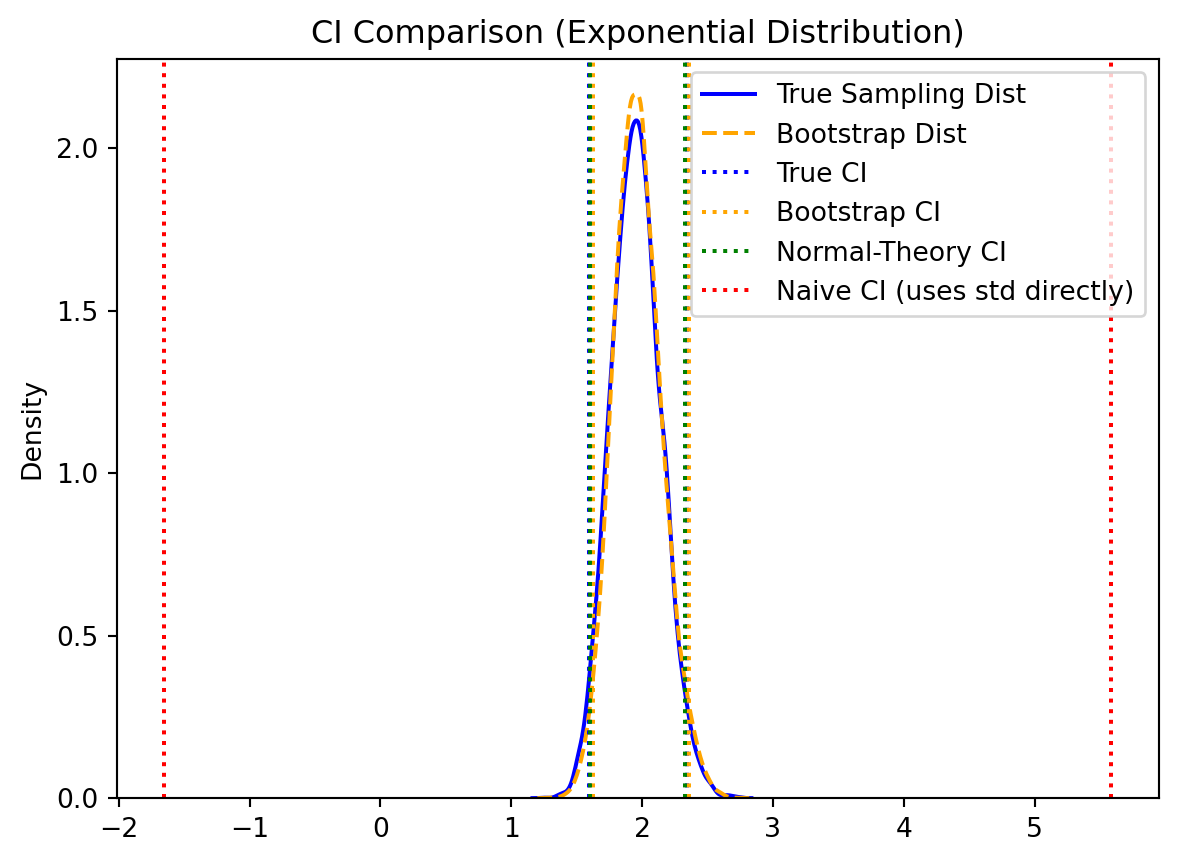

Sample Mean: 1.967
True CI: [1.5979144  2.34577445]
Bootstrap CI: [1.62388954 2.35938801]
Normal-Theory CI: [1.60463905 2.32850834]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Skewed population distribution
np.random.seed(42)
population = np.random.exponential(scale=2.0, size=10000)

# 2. Single sample from population
sample_size = 100
sample = np.random.choice(population, size=sample_size, replace=False)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# 3. Bootstrap distribution of the mean
n_bootstraps = 10000
bootstrap_means = np.array([
    np.mean(np.random.choice(sample, size=sample_size, replace=True))
    for _ in range(n_bootstraps)
])
boot_ci = np.percentile(bootstrap_means, [2.5, 97.5])

# 4. True CI from repeated sampling
n_simulations = 10000
simulated_means = np.array([
    np.mean(np.random.choice(population, size=sample_size, replace=False))
    for _ in range(n_simulations)
])
true_ci = np.percentile(simulated_means, [2.5, 97.5])

# 5. Normal-theory CI
normal_ci = sample_mean + np.array([-1.96, 1.96]) * (sample_std / np.sqrt(sample_size))

# 6. Naive CI (ignores n)
naive_ci = sample_mean + np.array([-1.96, 1.96]) * sample_std

# 7. Plotting
sns.kdeplot(simulated_means, label="True Sampling Dist", color="blue")
sns.kdeplot(bootstrap_means, label="Bootstrap Dist", color="orange", linestyle="--")
plt.axvline(true_ci[0], color="blue", linestyle=":", label="True CI")
plt.axvline(true_ci[1], color="blue", linestyle=":")
plt.axvline(boot_ci[0], color="orange", linestyle=":", label="Bootstrap CI")
plt.axvline(boot_ci[1], color="orange", linestyle=":")
plt.axvline(normal_ci[0], color="green", linestyle=":", label="Normal-Theory CI")
plt.axvline(normal_ci[1], color="green", linestyle=":")
plt.axvline(naive_ci[0], color="red", linestyle=":", label="Naive CI (uses std directly)")
plt.axvline(naive_ci[1], color="red", linestyle=":")
plt.title("CI Comparison (Exponential Distribution)")
plt.legend()
plt.show()

# 7. Print comparison
print(f"Sample Mean: {sample_mean:.3f}")
print(f"True CI: {true_ci}")
print(f"Bootstrap CI: {boot_ci}")
print(f"Normal-Theory CI: {normal_ci}")

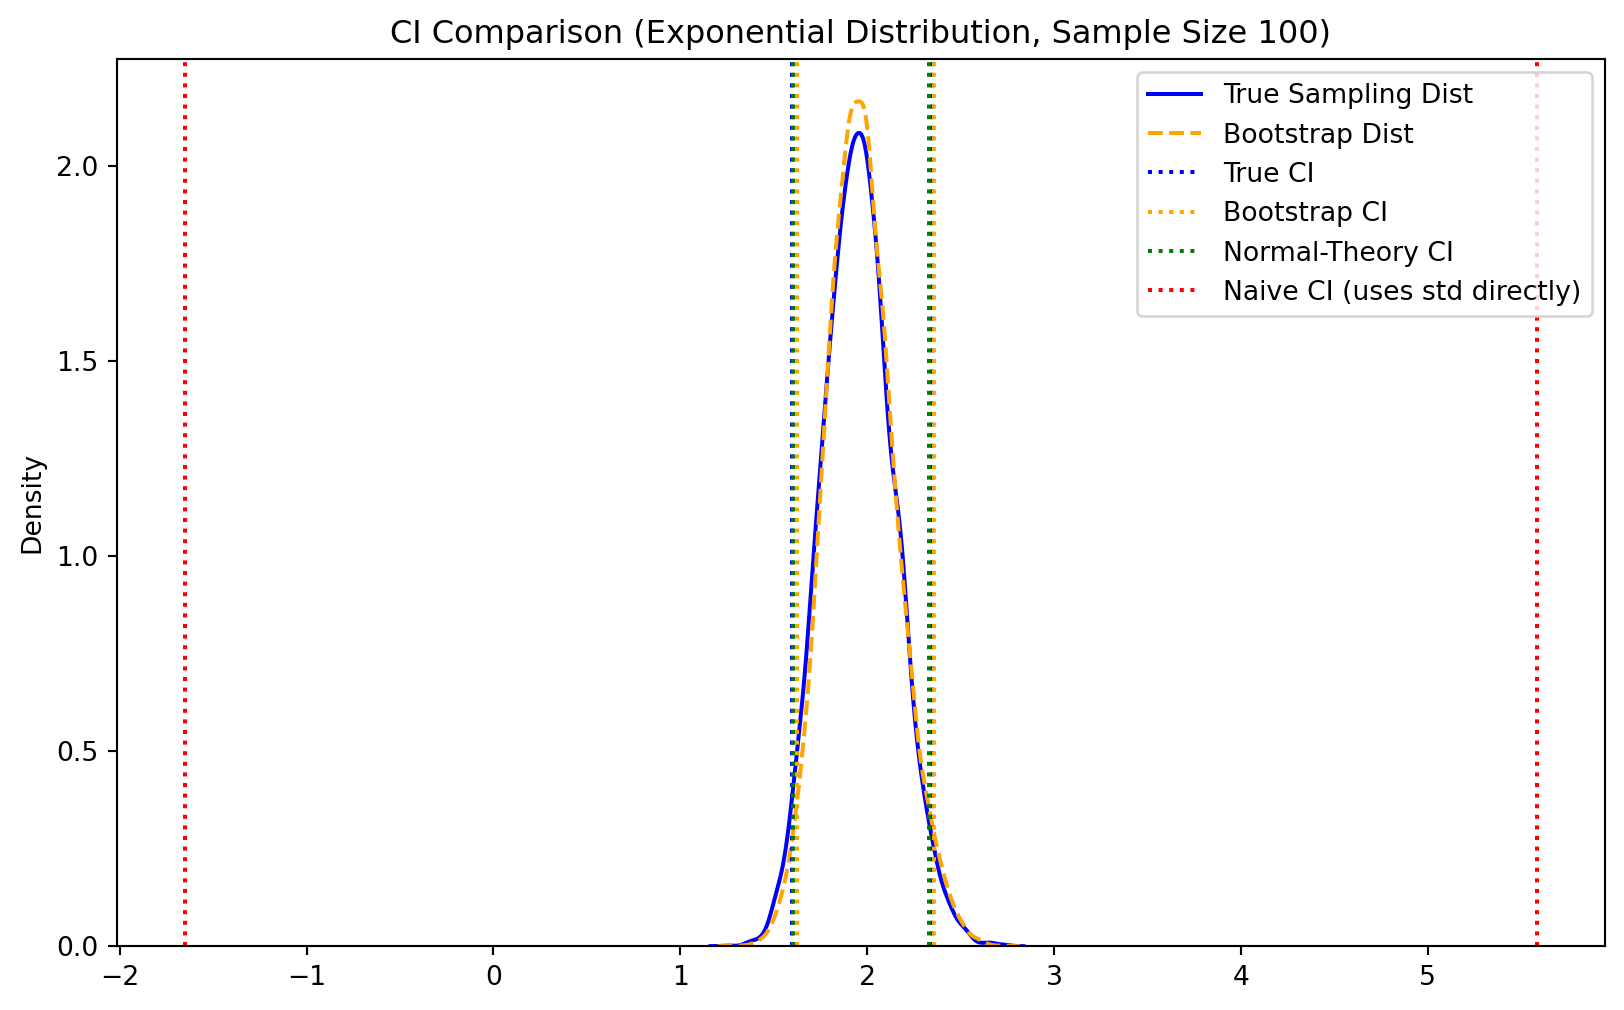

True CI: [1.5979144  2.34577445]
Bootstrap CI: [1.62388954 2.35938801]
Normal-Theory CI: [1.60463905 2.32850834]
Naive CI: [-1.65277273  5.58592012]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Set a skewed population distribution
np.random.seed(42)
population = np.random.exponential(scale=2.0, size=10000)  # mean = 2

# 2. Take one random sample from the population
sample_size = 100
sample = np.random.choice(population, size=sample_size, replace=False)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# 3. Compute bootstrap distribution of the mean
n_bootstraps = 10000
bootstrap_means = np.array([
    np.mean(np.random.choice(sample, size=sample_size, replace=True))
    for _ in range(n_bootstraps)
])

# 4. Bootstrap CI (95%)
boot_ci = np.percentile(bootstrap_means, [2.5, 97.5])

# 5. True CI by repeated sampling
n_simulations = 10000
simulated_means = np.array([
    np.mean(np.random.choice(population, size=sample_size, replace=False))
    for _ in range(n_simulations)
])
true_ci = np.percentile(simulated_means, [2.5, 97.5])

# 6. Normal-theory CI
normal_se = sample_std / np.sqrt(sample_size)
normal_ci = sample_mean + np.array([-1.96, 1.96]) * normal_se

# 7. Naive CI (ignores n)
naive_ci = sample_mean + np.array([-1.96, 1.96]) * sample_std

# 8. Visualization
plt.figure(figsize=(10, 6))
sns.kdeplot(simulated_means, label="True Sampling Dist", color="blue")
sns.kdeplot(bootstrap_means, label="Bootstrap Dist", color="orange", linestyle="--")
plt.axvline(true_ci[0], color="blue", linestyle=":", label="True CI")
plt.axvline(true_ci[1], color="blue", linestyle=":")
plt.axvline(boot_ci[0], color="orange", linestyle=":", label="Bootstrap CI")
plt.axvline(boot_ci[1], color="orange", linestyle=":")
plt.axvline(normal_ci[0], color="green", linestyle=":", label="Normal-Theory CI")
plt.axvline(normal_ci[1], color="green", linestyle=":")
plt.axvline(naive_ci[0], color="red", linestyle=":", label="Naive CI (uses std directly)")
plt.axvline(naive_ci[1], color="red", linestyle=":")
plt.title("CI Comparison (Exponential Distribution, Sample Size 100)")
plt.legend()
plt.show()

# Print comparison
print(f"True CI: {true_ci}")
print(f"Bootstrap CI: {boot_ci}")
print(f"Normal-Theory CI: {normal_ci}")
print(f"Naive CI: {naive_ci}")

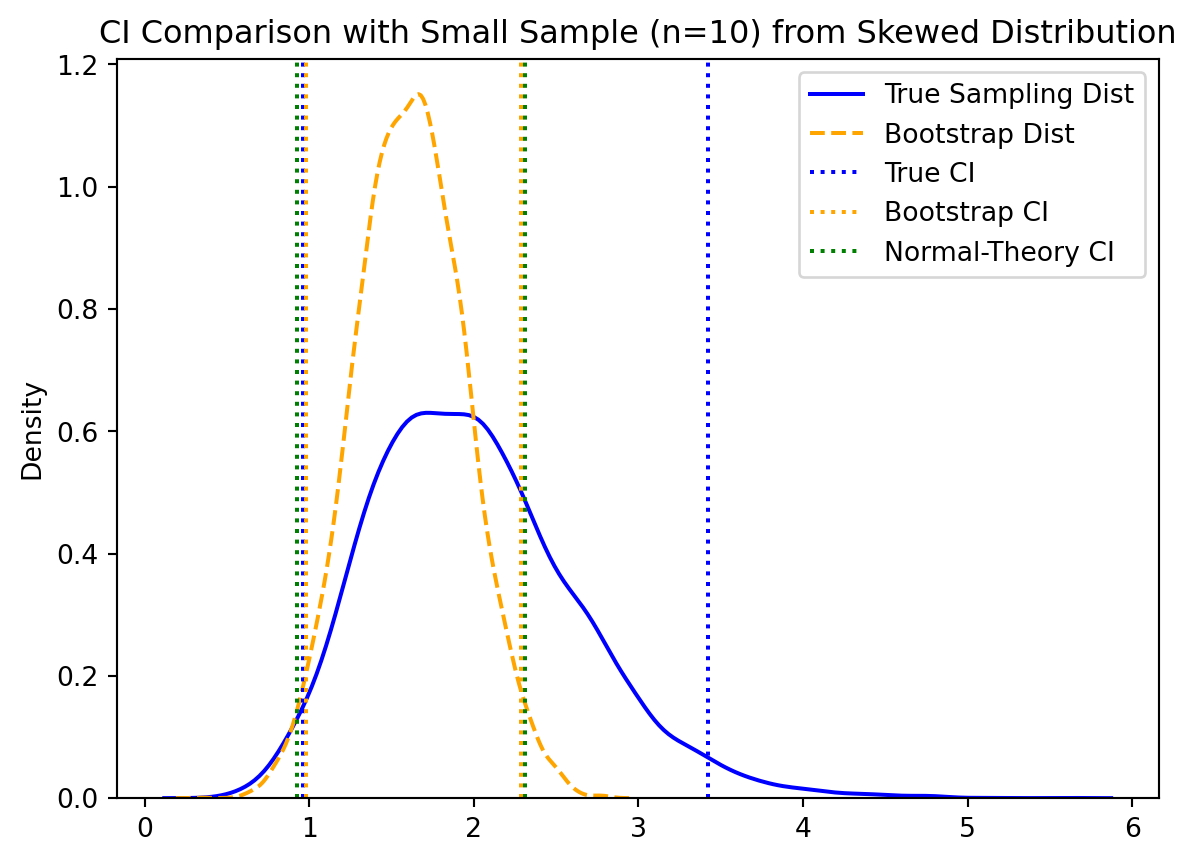

Sample Mean: 1.619
True CI:          [0.96432733 3.4209794 ]
Bootstrap CI:     [0.98059327 2.28526628]
Normal-Theory CI: [0.92412973 2.31300113]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Set up a skewed population
np.random.seed(42)
population = np.random.exponential(scale=2.0, size=100000)

# 2. Draw a **small** sample
sample_size = 10
sample = np.random.choice(population, size=sample_size, replace=False)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# 3. Bootstrap CI
n_bootstraps = 10000
bootstrap_means = np.array([
    np.mean(np.random.choice(sample, size=sample_size, replace=True))
    for _ in range(n_bootstraps)
])
boot_ci = np.percentile(bootstrap_means, [2.5, 97.5])

# 4. True CI from repeated sampling
n_simulations = 10000
simulated_means = np.array([
    np.mean(np.random.choice(population, size=sample_size, replace=False))
    for _ in range(n_simulations)
])
true_ci = np.percentile(simulated_means, [2.5, 97.5])

# 5. Normal-theory CI (CLT-based)
normal_se = sample_std / np.sqrt(sample_size)
normal_ci = sample_mean + np.array([-1.96, 1.96]) * normal_se

# 6. Plotting
sns.kdeplot(simulated_means, label="True Sampling Dist", color="blue")
sns.kdeplot(bootstrap_means, label="Bootstrap Dist", color="orange", linestyle="--")
plt.axvline(true_ci[0], color="blue", linestyle=":", label="True CI")
plt.axvline(true_ci[1], color="blue", linestyle=":")
plt.axvline(boot_ci[0], color="orange", linestyle=":", label="Bootstrap CI")
plt.axvline(boot_ci[1], color="orange", linestyle=":")
plt.axvline(normal_ci[0], color="green", linestyle=":", label="Normal-Theory CI")
plt.axvline(normal_ci[1], color="green", linestyle=":")
plt.title("CI Comparison with Small Sample (n=10) from Skewed Distribution")
plt.legend()
plt.show()

# 7. Print comparison
print(f"Sample Mean: {sample_mean:.3f}")
print(f"True CI:          {true_ci}")
print(f"Bootstrap CI:     {boot_ci}")
print(f"Normal-Theory CI: {normal_ci}")

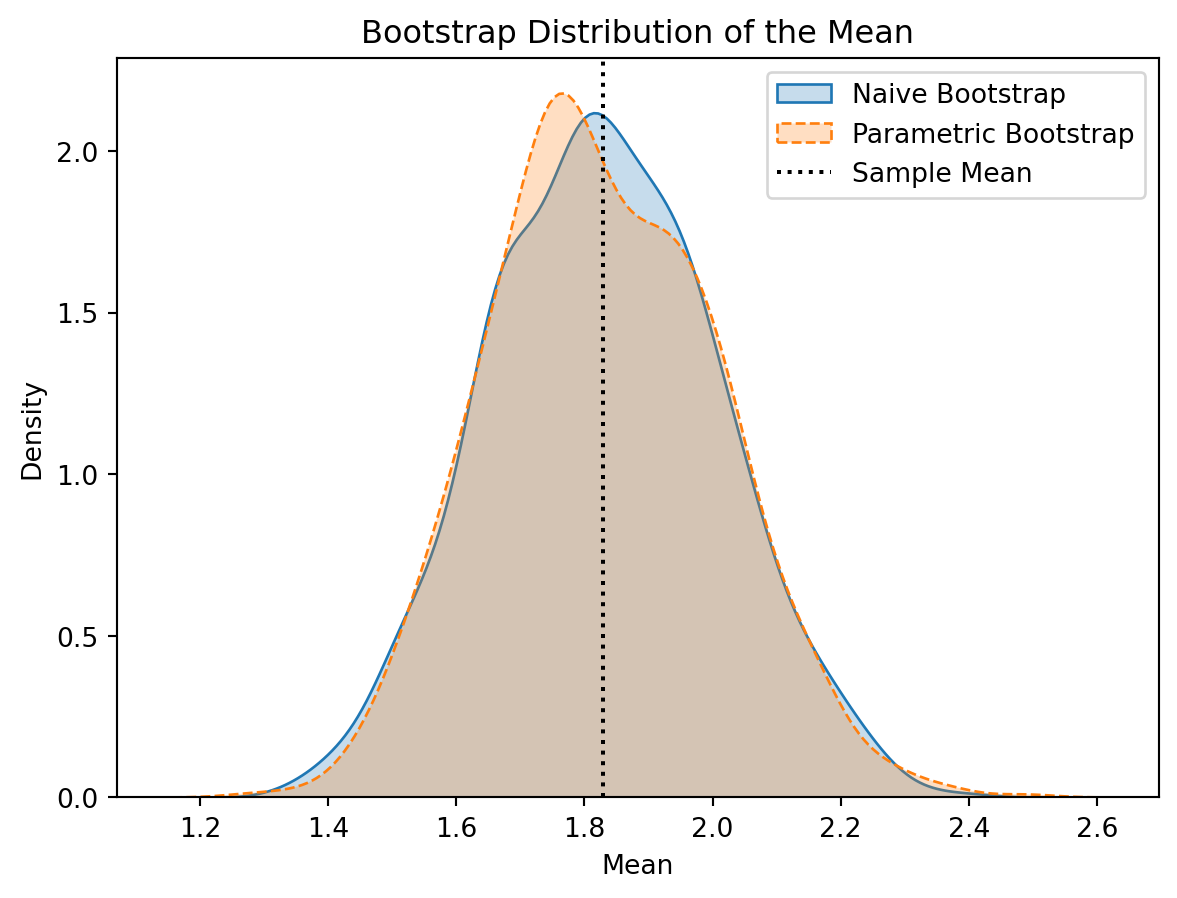

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: maybe heights, weights, etc.
np.random.seed(42)
data = np.random.exponential(scale=2.0, size=100)

def naive_bootstrap(data, n_boot=1000):
    n = len(data)
    means = []
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(sample))
    return np.array(means)

def parametric_bootstrap(data, n_boot=1000):
    n = len(data)
    fitted_scale = np.mean(data)  # MLE for exponential is just the mean
    means = []
    for _ in range(n_boot):
        sample = np.random.exponential(scale=fitted_scale, size=n)
        means.append(np.mean(sample))
    return np.array(means)

# Run bootstraps
naive_means = naive_bootstrap(data)
param_means = parametric_bootstrap(data)

# Plot
sns.kdeplot(naive_means, label="Naive Bootstrap", fill=True)
sns.kdeplot(param_means, label="Parametric Bootstrap", fill=True, linestyle='--')
plt.axvline(np.mean(data), color='k', linestyle=':', label='Sample Mean')
plt.title("Bootstrap Distribution of the Mean")
plt.xlabel("Mean")
plt.legend()
plt.show()

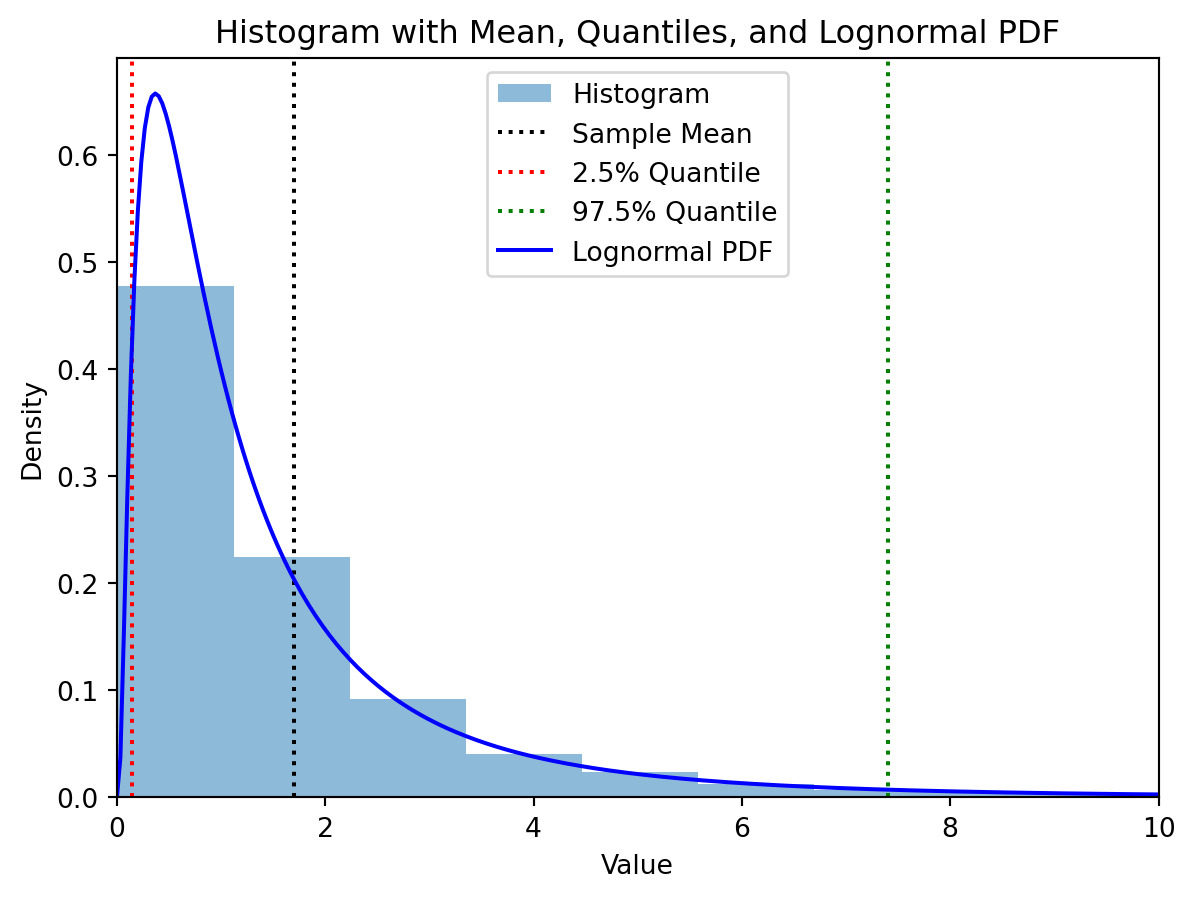

In [6]:
from scipy.stats import lognorm

data = np.random.lognormal(mean=0, sigma=1, size=10000)

# print(skew(data))

# plot mean, 0.025 and 0.975 quantiles
plt.hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
plt.axvline(np.mean(data), color='k', linestyle=':', label='Sample Mean')
plt.axvline(np.percentile(data, 2.5), color='r', linestyle=':', label='2.5% Quantile')
plt.axvline(np.percentile(data, 97.5), color='g', linestyle=':', label='97.5% Quantile')
plt.xlim(0, 10)
# Plot the PDF of the lognormal distribution
x = np.linspace(0, max(data), 1000)
pdf = lognorm.pdf(x, s=1, scale=np.exp(0))  # s=sigma, scale=exp(mean)
plt.plot(x, pdf, color='b', label='Lognormal PDF')

plt.title("Histogram with Mean, Quantiles, and Lognormal PDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()